In [5]:
import pandas as pd
data = pd.read_csv('black-friday.csv')#1

In [7]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
data.loc[:, 'Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])
data.loc[:, 'Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])


In [20]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

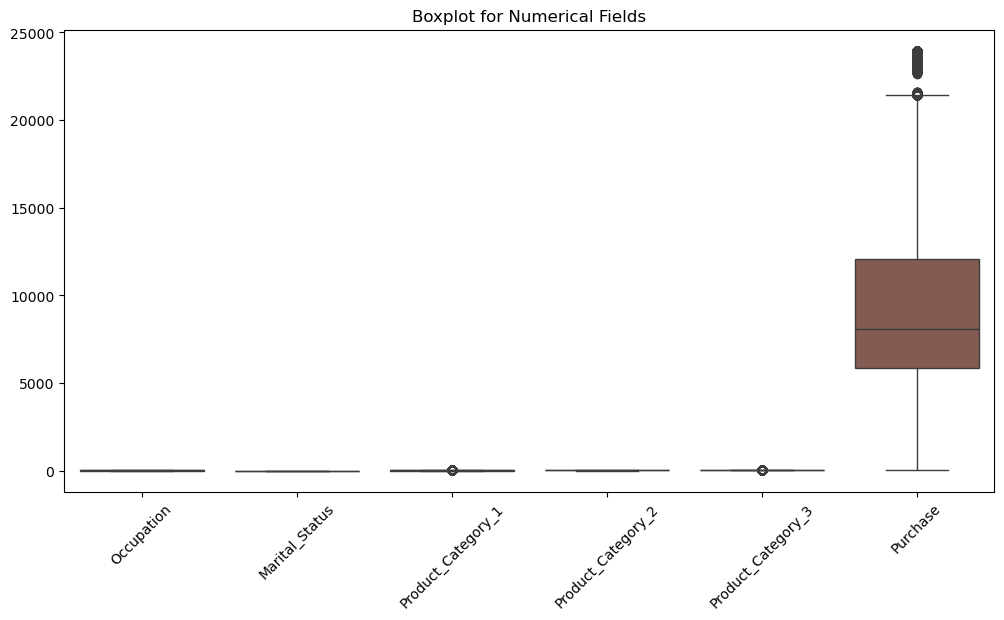

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = ["Occupation", "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Fields")
plt.show()

In [33]:
import pandas as pd

numerical_columns = ['Occupation', 'Marital_Status', 'Product_Category_1', 
                     'Product_Category_2', 'Product_Category_3', 'Purchase']
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_cleaned = remove_outliers(data, numerical_columns)
print("Original shape:", data.shape)
print("After removing outliers:", data_cleaned.shape)


Original shape: (550068, 12)
After removing outliers: (384430, 12)


In [37]:
data_cleaned 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
545909,1006040,P00227142,M,26-35,6,B,2,0,5,8.0,16.0,3598
545910,1006040,P00184342,M,26-35,6,B,2,0,8,8.0,16.0,9855
545911,1006040,P00193142,M,26-35,6,B,2,0,5,8.0,16.0,1962
545912,1006040,P00029842,M,26-35,6,B,2,0,8,8.0,16.0,7852


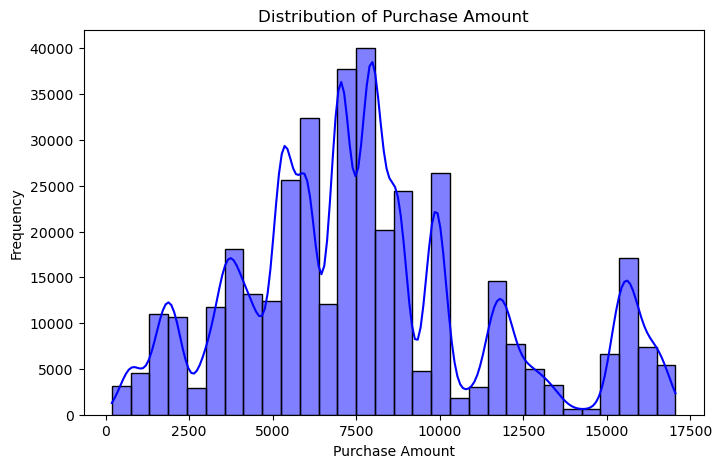

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Purchase'], bins=30, kde=True, color='blue')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\HASINI\AppData\Local\Temp\ipykernel_16132\1029662312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_cleaned, palette="coolwarm")


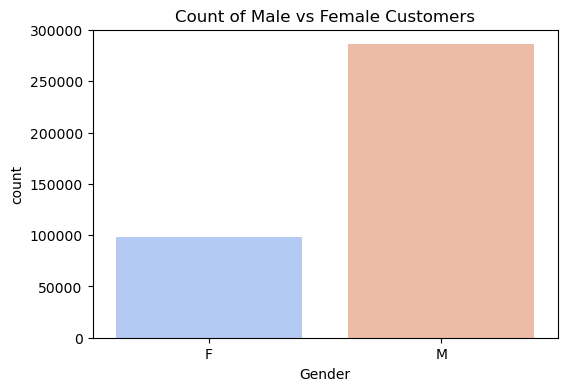

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data_cleaned, palette="coolwarm")
plt.title("Count of Male vs Female Customers")
plt.show()

C:\Users\HASINI\AppData\Local\Temp\ipykernel_16132\3596489632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=data_cleaned, palette="viridis")


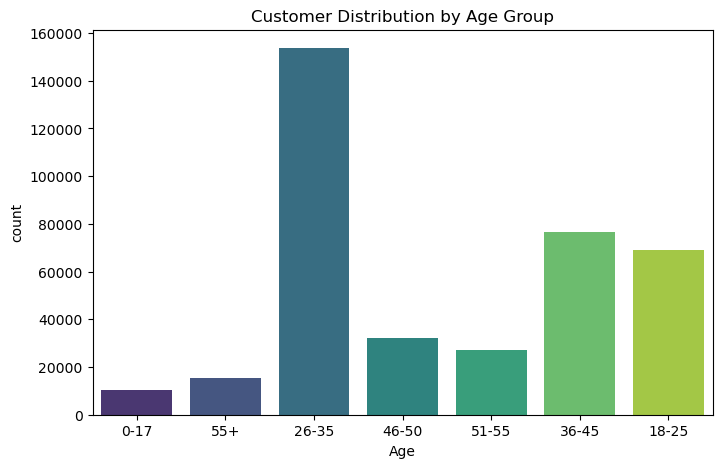

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age', data=data_cleaned, palette="viridis")
plt.title("Customer Distribution by Age Group")
plt.show()

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

features = ['Occupation', 'Marital_Status', 'Product_Category_1', 
            'Product_Category_2', 'Product_Category_3']
X = data_cleaned[features]

y = data_cleaned['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

r2_scores = {}


In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    r2_scores[name] = r2_score(y_test, y_pred) 

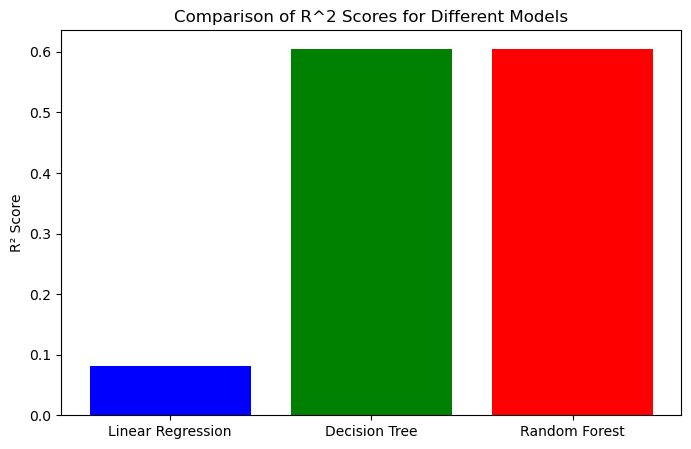

In [59]:
plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red'])
plt.title("Comparison of R^2 Scores for Different Models")
plt.ylabel("R² Score")
plt.show()

In [57]:
for name, score in r2_scores.items():
    print(f"{name}: R^2 Score = {score:.4f}")


Linear Regression: R^2 Score = 0.0806
Decision Tree: R^2 Score = 0.6048
Random Forest: R^2 Score = 0.6054
